In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# etc.

# Load the dataset from the uploaded file
bh_data = pd.read_csv('D:/CS Classes at GT/CS 7641 - ML/ASSIGNMENT-1/boston.csv')
print(bh_data.head())
print(bh_data.info())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-nu

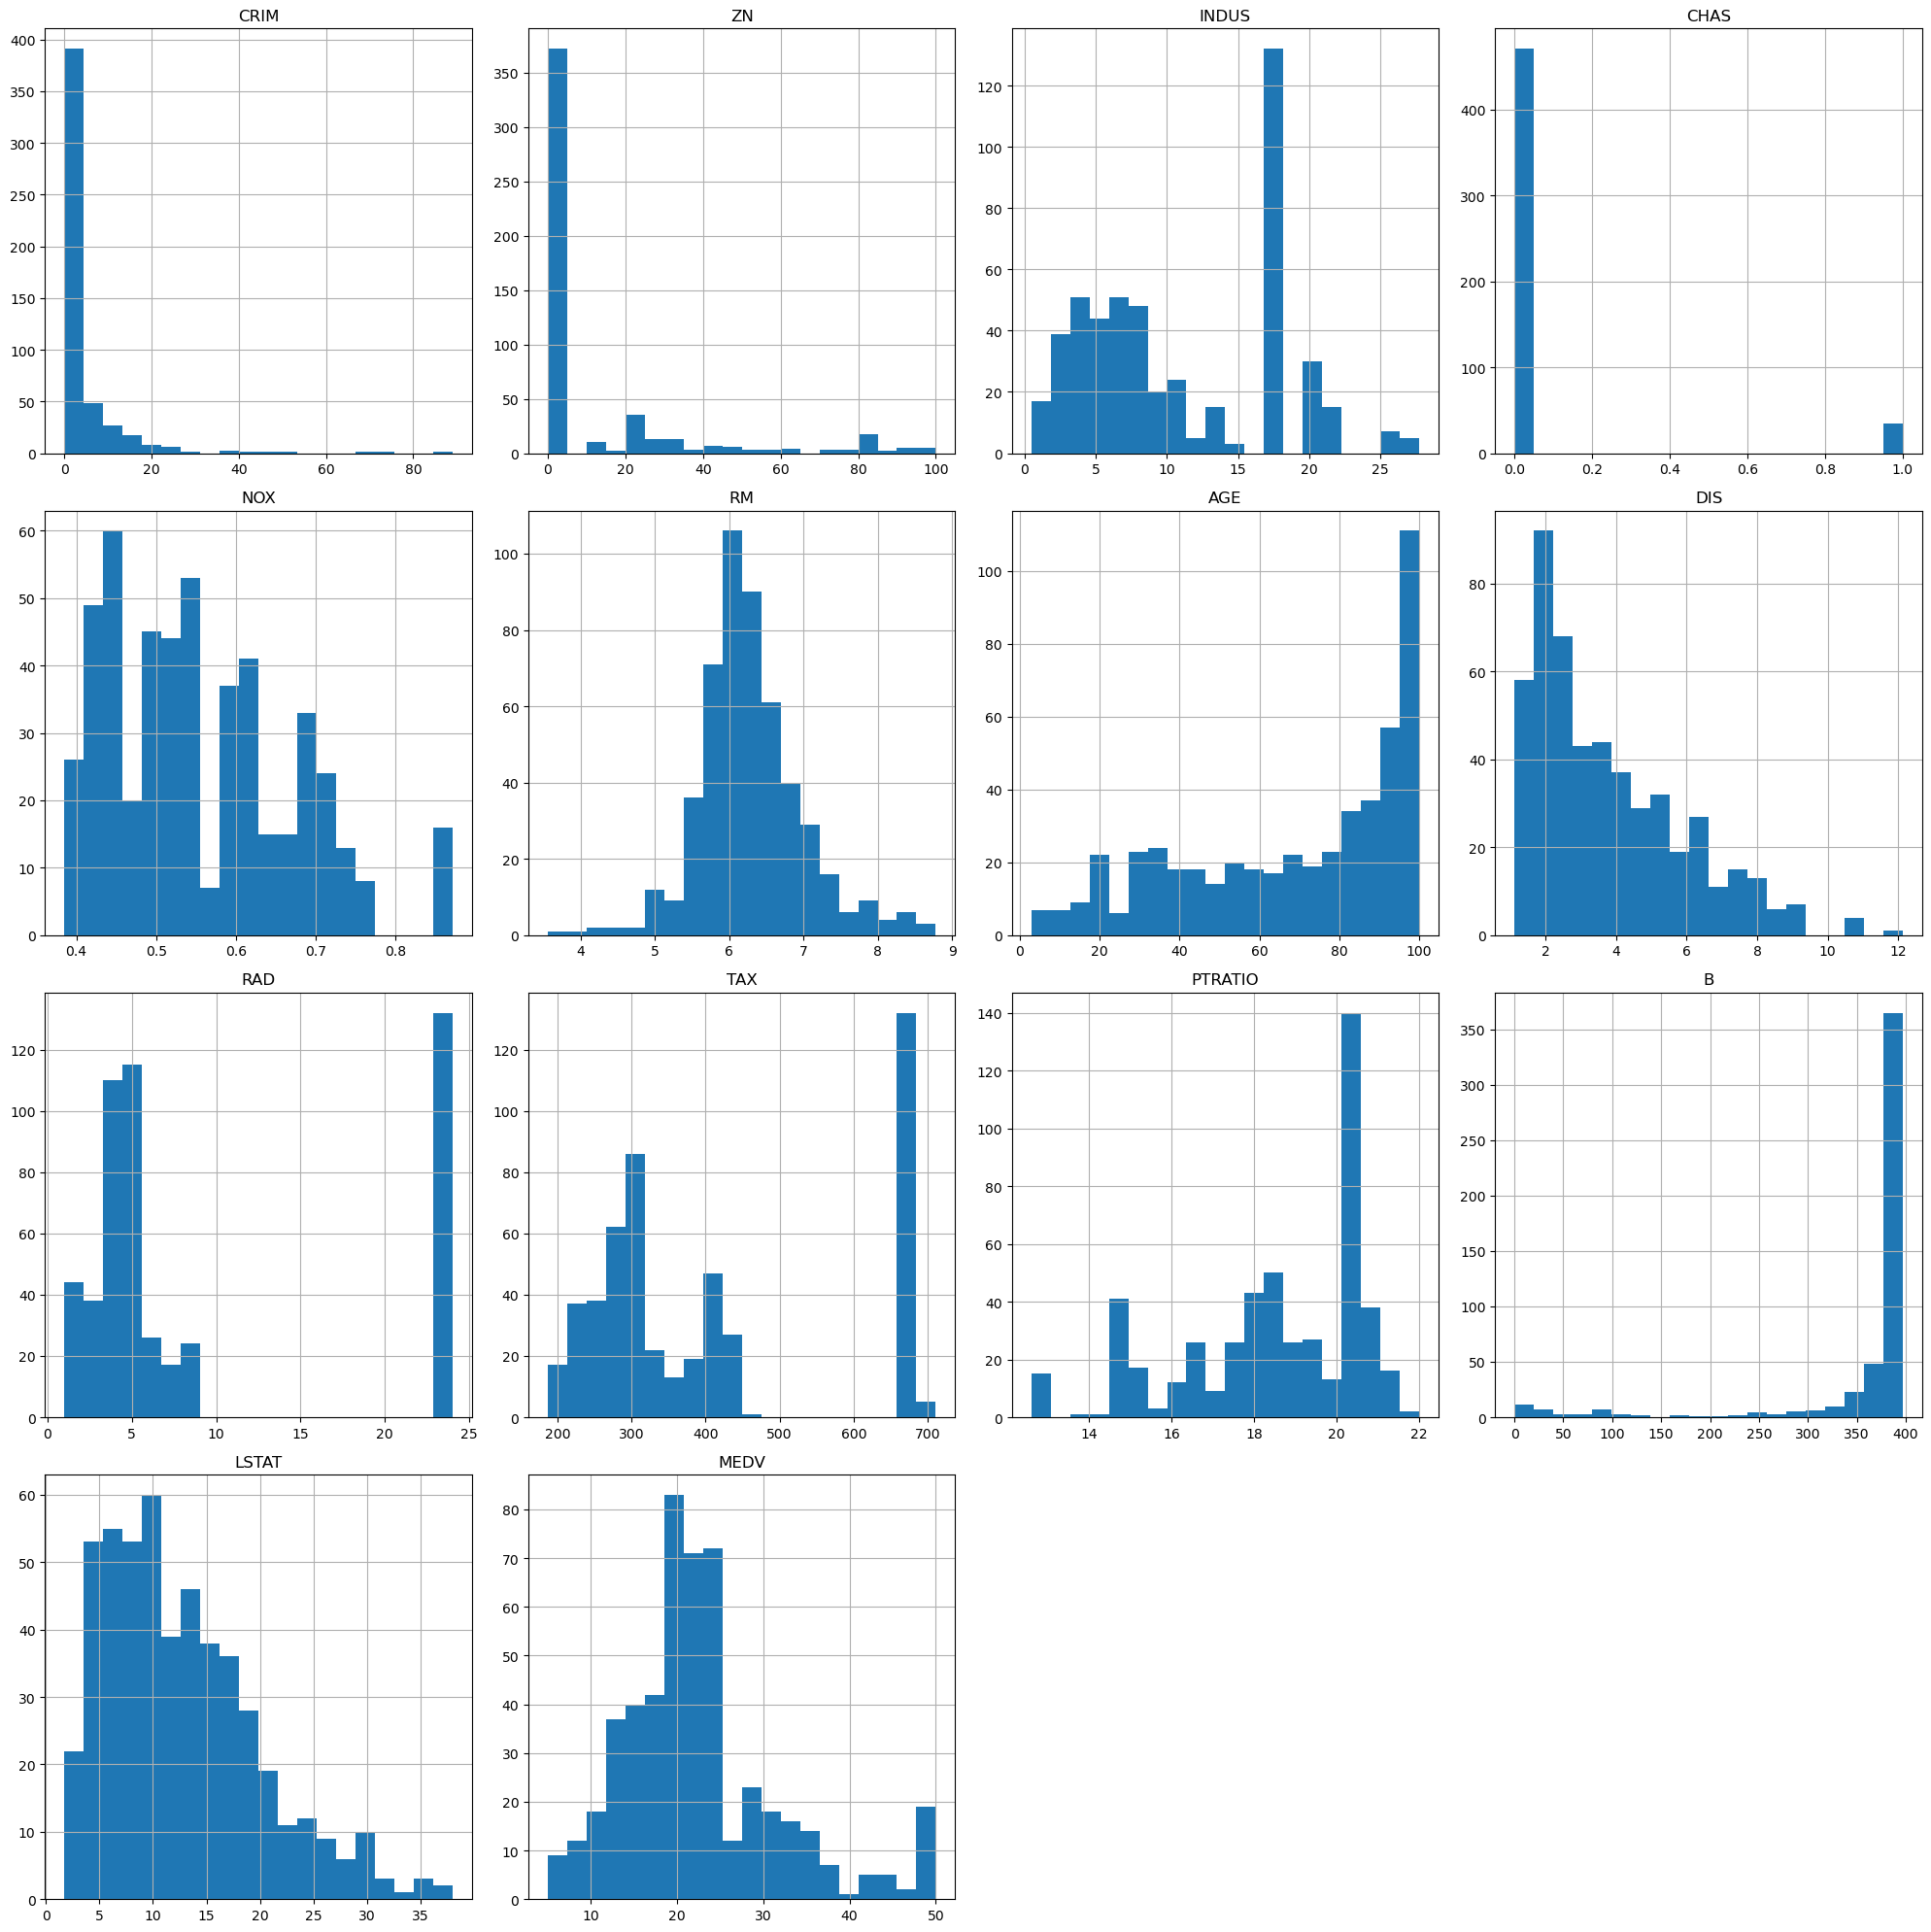

In [3]:
# Visualize the distribution of each feature in the dataset
bh_data.hist(figsize=(20, 20), bins=20)
plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()


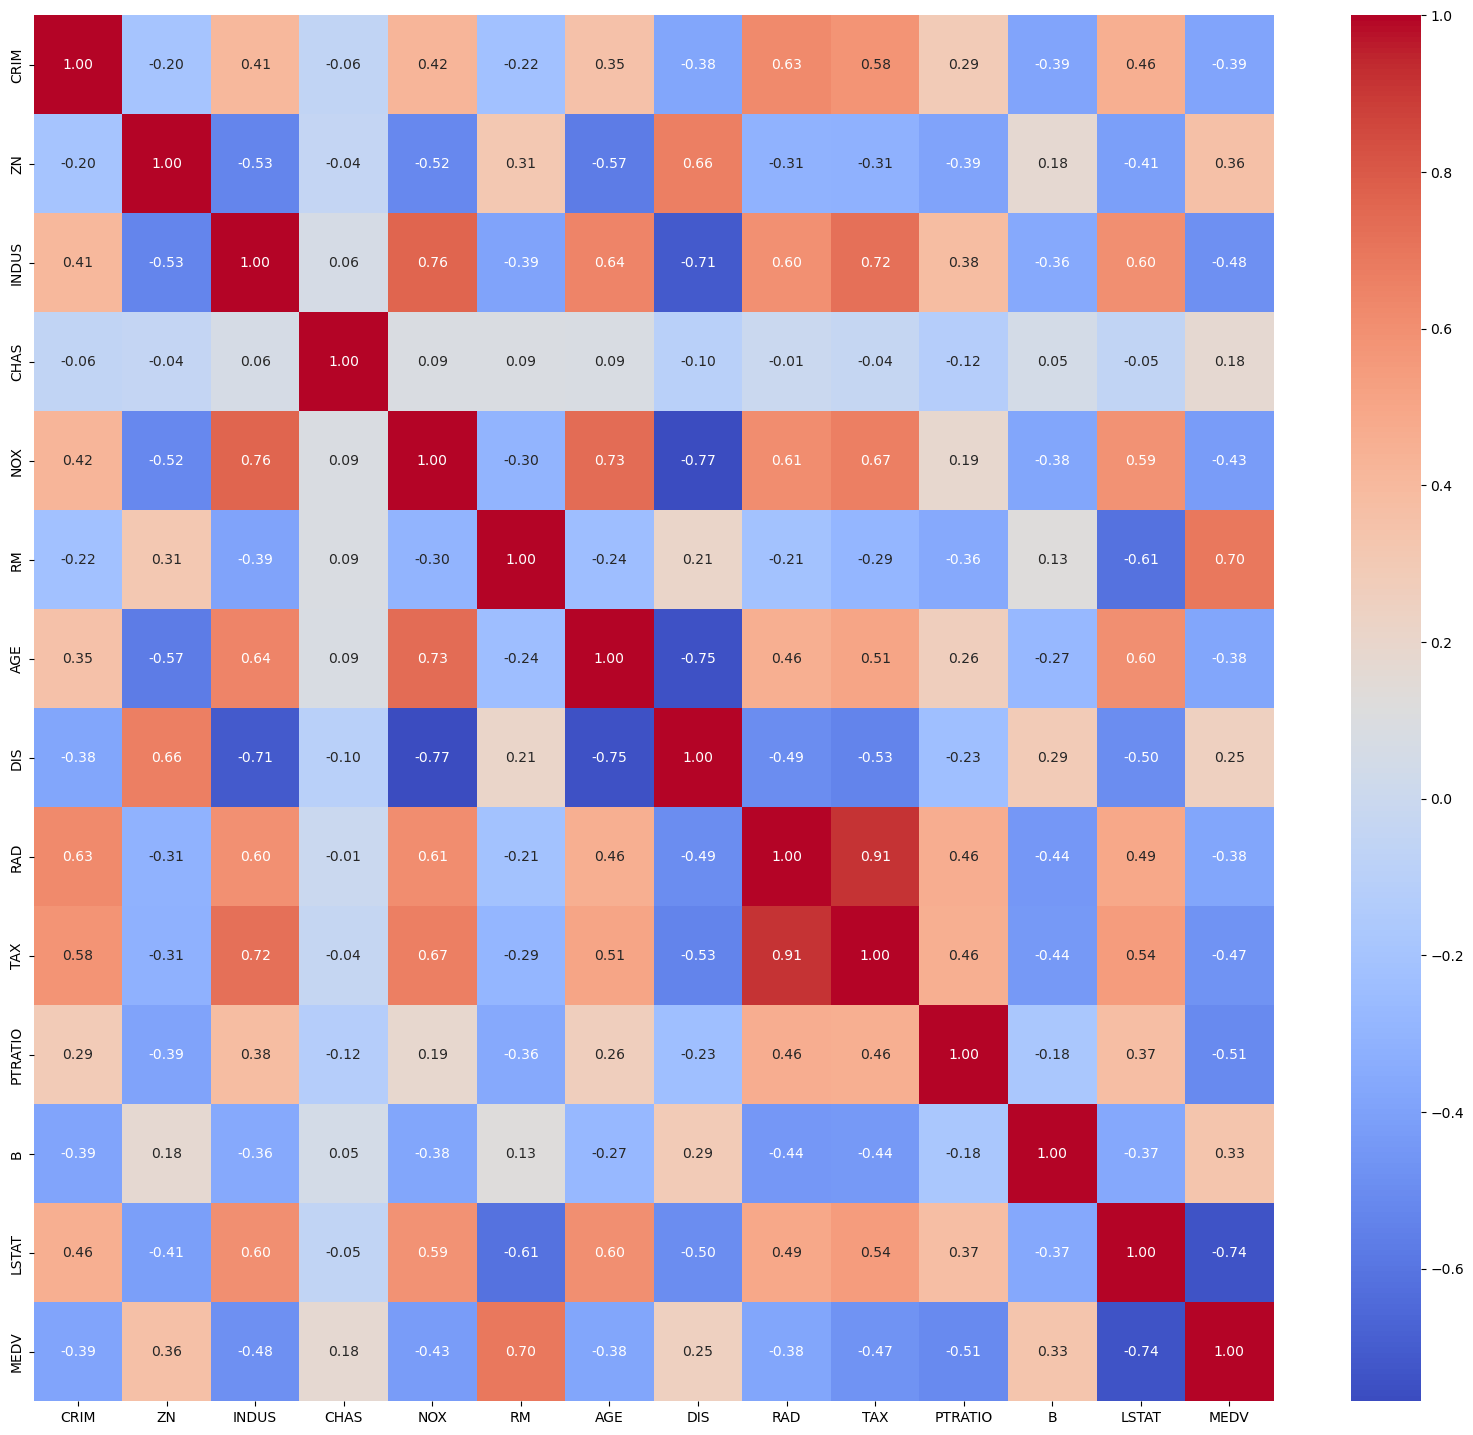

In [4]:
plt.figure(figsize=(20, 18))
# Generate a heatmap for the correlation matrix of the Boston Housing dataset
sns.heatmap(bh_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

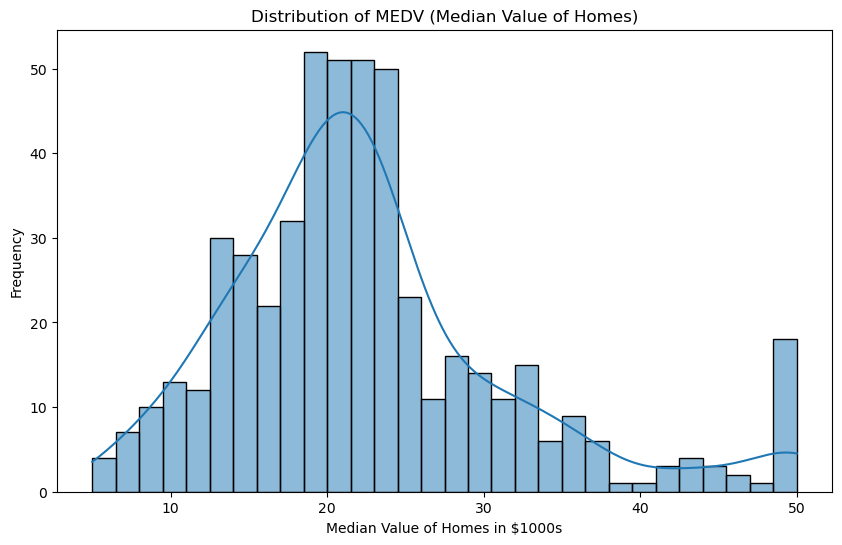

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(bh_data['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV (Median Value of Homes)')
plt.xlabel('Median Value of Homes in $1000s')
plt.ylabel('Frequency')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features (independent variables) and the target (dependent variable)
X = bh_data.drop('MEDV', axis=1)
y = bh_data['MEDV']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [7]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(
    max_depth=3,  # Lower the max depth based on validation curve
    min_samples_leaf=8,  # You might try increasing this if overfitting persists
    min_samples_split=20,  # Require more samples to split a node
    min_impurity_decrease=0.001,  # Small positive number for further pruning
    random_state=42
)

# Train the model
dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, min_impurity_decrease=0.001,
                      min_samples_leaf=8, min_samples_split=20,
                      random_state=42)

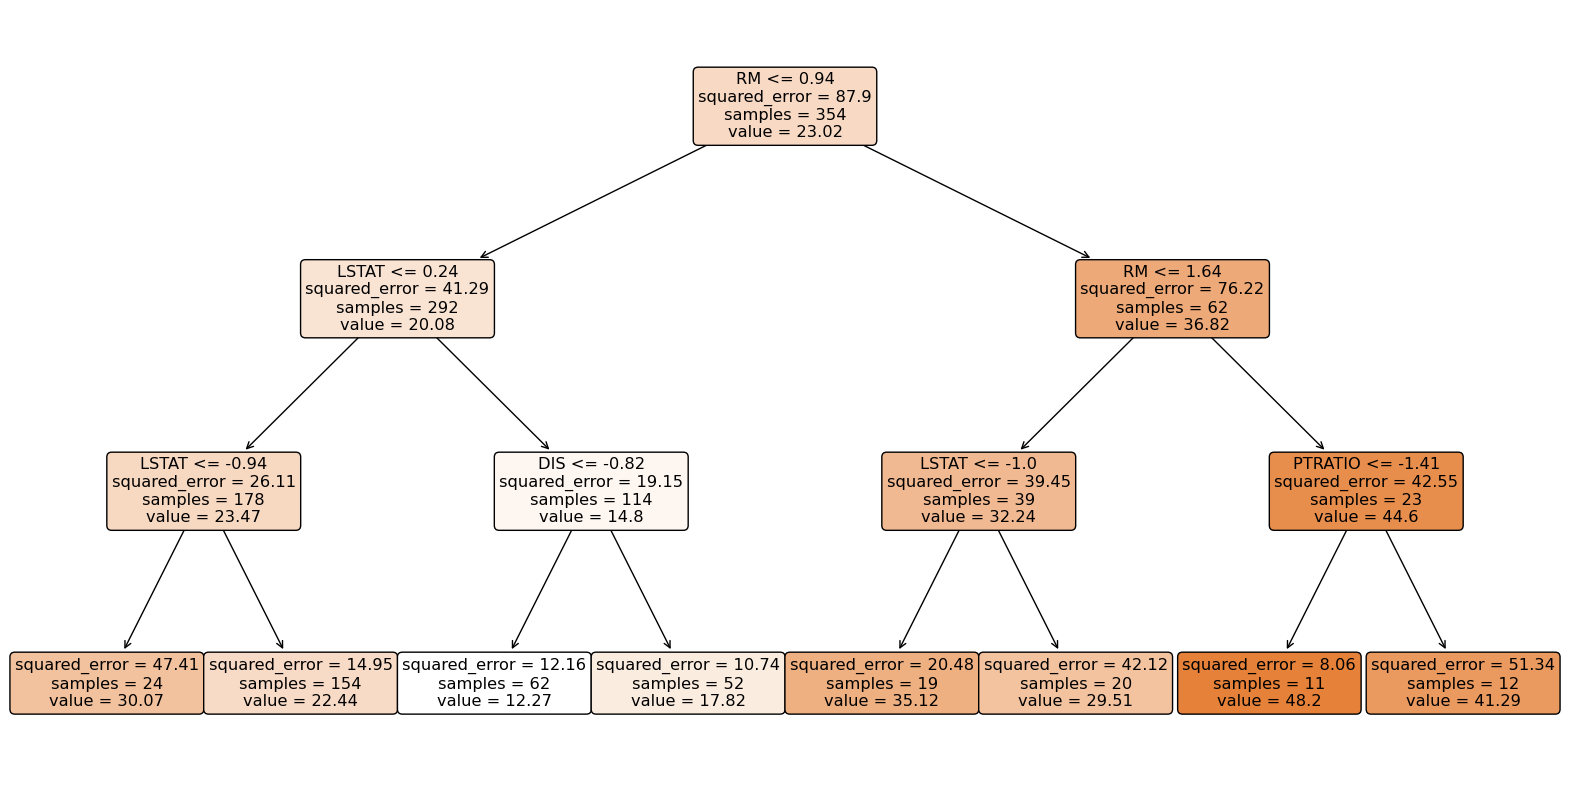

In [8]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns.tolist(), rounded=True, proportion=False, precision=2)
plt.show()

In [9]:
from sklearn.tree import export_text

# Convert the decision tree regressor to a text representation
tree_text = export_text(dt, feature_names=X.columns.tolist())

# Print the text representation of the tree
print(tree_text)


|--- RM <= 0.94
|   |--- LSTAT <= 0.24
|   |   |--- LSTAT <= -0.94
|   |   |   |--- value: [30.07]
|   |   |--- LSTAT >  -0.94
|   |   |   |--- value: [22.44]
|   |--- LSTAT >  0.24
|   |   |--- DIS <= -0.82
|   |   |   |--- value: [12.27]
|   |   |--- DIS >  -0.82
|   |   |   |--- value: [17.82]
|--- RM >  0.94
|   |--- RM <= 1.64
|   |   |--- LSTAT <= -1.00
|   |   |   |--- value: [35.12]
|   |   |--- LSTAT >  -1.00
|   |   |   |--- value: [29.51]
|   |--- RM >  1.64
|   |   |--- PTRATIO <= -1.41
|   |   |   |--- value: [48.20]
|   |   |--- PTRATIO >  -1.41
|   |   |   |--- value: [41.29]



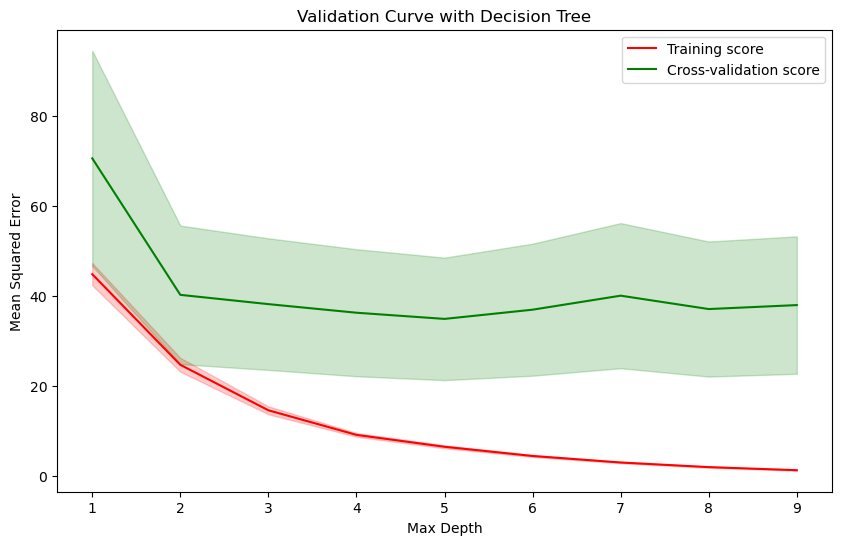

In [10]:
from sklearn.model_selection import validation_curve

# Choose a wider range of the parameter if necessary
param_range = np.arange(1, 10)

# Increase the number of cross-validation folds
num_folds = 10
# Example: Increase to 10 folds

train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(), X_scaled, y, 
    param_name="max_depth", 
    param_range=param_range,
    scoring="neg_mean_squared_error", 
    n_jobs=-1, 
    cv=num_folds)  # Increase the number of folds here

# Calculate means and standard deviations of the negative MSE, then negate to get MSE
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")

# Plotting the band of the standard deviation with a narrower band by reducing the factor
plt.fill_between(param_range, train_mean - train_std / 2, train_mean + train_std / 2, color="red", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std / 2, test_mean + test_std / 2, color="green", alpha=0.2)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.show()


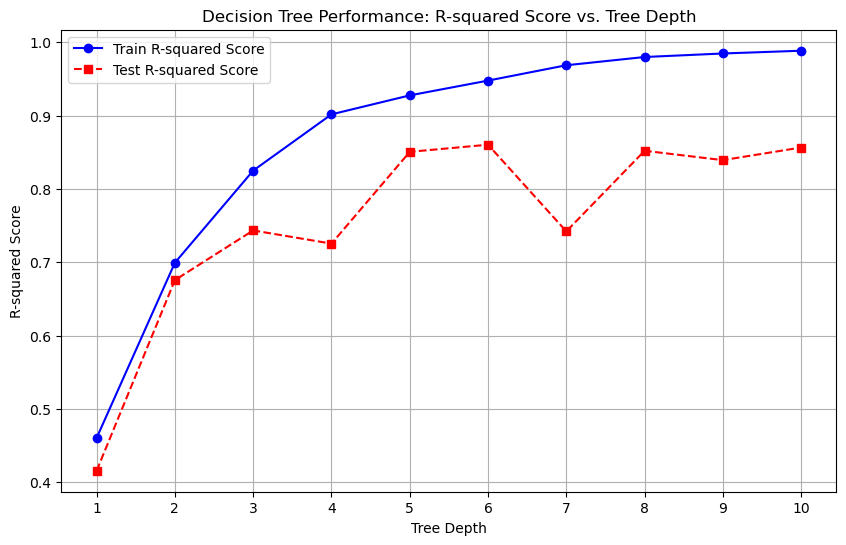

In [11]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the range of tree depths to explore
max_depths = range(1, 11)  # You can adjust this range as needed
train_r2_scores = []
test_r2_scores = []

# Loop over the range of tree depths
for depth in max_depths:
    # Initialize and train the decision tree regressor at the given depth
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    # Make predictions on both the training and test sets
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    
    # Calculate and record the R-squared score for both training and testing sets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Plotting Train and Test R-squared Scores vs. Tree Depth
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_r2_scores, marker='o', linestyle='-', color='blue', label='Train R-squared Score')
plt.plot(max_depths, test_r2_scores, marker='s', linestyle='--', color='red', label='Test R-squared Score')
plt.title('Decision Tree Performance: R-squared Score vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared Score')
plt.legend()
plt.grid(True)
plt.xticks(max_depths)  # Ensure all depth values are shown as x-ticks
plt.show()


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [4],  # Single value in a list
    'min_samples_leaf': [10],  # Single value in a list
    'min_samples_split': [10],  # Single value in a list
    'min_impurity_decrease': [0.0],  # Single value in a list
}



# Initialize the Grid Search with cross-validation
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_  # It will be negative because of the scoring metric

# Output the best parameters and score, converting the score to a positive value
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score (MSE): {-best_score}")


Best Parameters: {'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 10}
Best Cross-Validation Score (MSE): 23.380922299091075


Mean Absolute Error (MAE): 3.0670139903811555
Mean Squared Error (MSE): 21.259635365828586
Root Mean Squared Error (RMSE): 4.6108172123636155
R-squared (R2): 0.7146859192493866


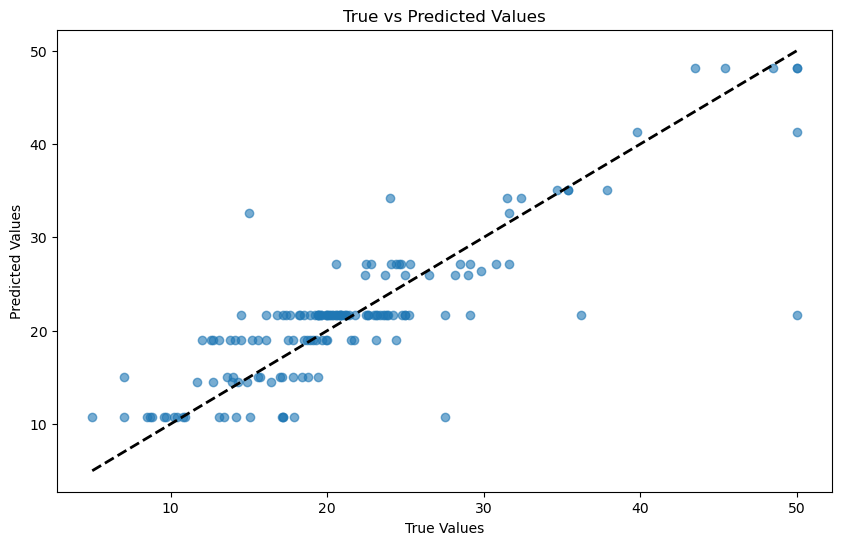

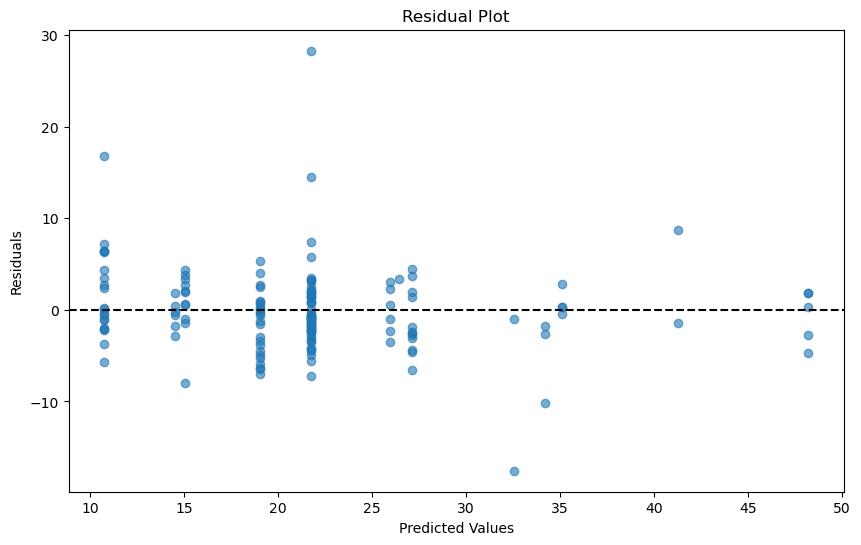

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
print("R-squared (R2):", r2_score(y_test, y_pred))

# Plotting the true vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()


In [13]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [20]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Initialize lists for line plot data
training_sizes_line = []
training_times_line = []
testing_times_line = []

# Variables for bar chart data (metrics at 100% training size)
training_time_bar = None
testing_time_bar = None
r2_score_bar = None
mae_bar = None
mse_bar = None

# Loop through training sizes for line plots
for size in np.linspace(0.1, 0.9, 9):
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(X_train, y_train, train_size=size, random_state=42)

    start_time = time.perf_counter()
    dt.fit(X_train_part, y_train_part)
    training_time = time.perf_counter() - start_time

    # Repeat predictions to get measurable testing time
    start_time = time.perf_counter()
    for _ in range(1000):  # Adjust as needed
        y_pred = dt.predict(X_test)
    testing_time = (time.perf_counter() - start_time) / 1000

    training_sizes_line.append(size * 100)
    training_times_line.append(training_time)
    testing_times_line.append(testing_time)

# Metrics for bar chart at 100% training size
dt.fit(X_train, y_train)
start_time = time.perf_counter()
for _ in range(1000):  # Repeat prediction
    y_pred_full_test = dt.predict(X_test)
testing_time_bar = (time.perf_counter() - start_time) / 1000

r2_score_bar = r2_score(y_test, y_pred_full_test)
mae_bar = mean_absolute_error(y_test, y_pred_full_test)
mse_bar = mean_squared_error(y_test, y_pred_full_test)

# Create DataFrames
line_plot_df = pd.DataFrame({
    'Training Size (%)': training_sizes_line,
    'Training Time (s)': training_times_line,
    'Testing Time (s)': testing_times_line
})

bar_chart_df = pd.DataFrame({
    'Metric': ['R2-Score', 'MAE', 'MSE'],
    'Value': [r2_score_bar, mae_bar, mse_bar]
})


# Export to Excel
with pd.ExcelWriter('D:\CS Classes at GT\CS 7641 - ML\ASSIGNMENT-1\Boston Housing- Figures\Compareboston_housing_performance_analysis.xlsx') as writer:
    line_plot_df.to_excel(writer, sheet_name='Line Plots Data', index=False)
    bar_chart_df.to_excel(writer, sheet_name='Bar Chart Data', index=False)
